In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

# Ejercicio 1

## Variable categórica

In [5]:
alquiler = pd.read_csv("preu lloguer per trimestre i barri.csv")

In [6]:
alquiler

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


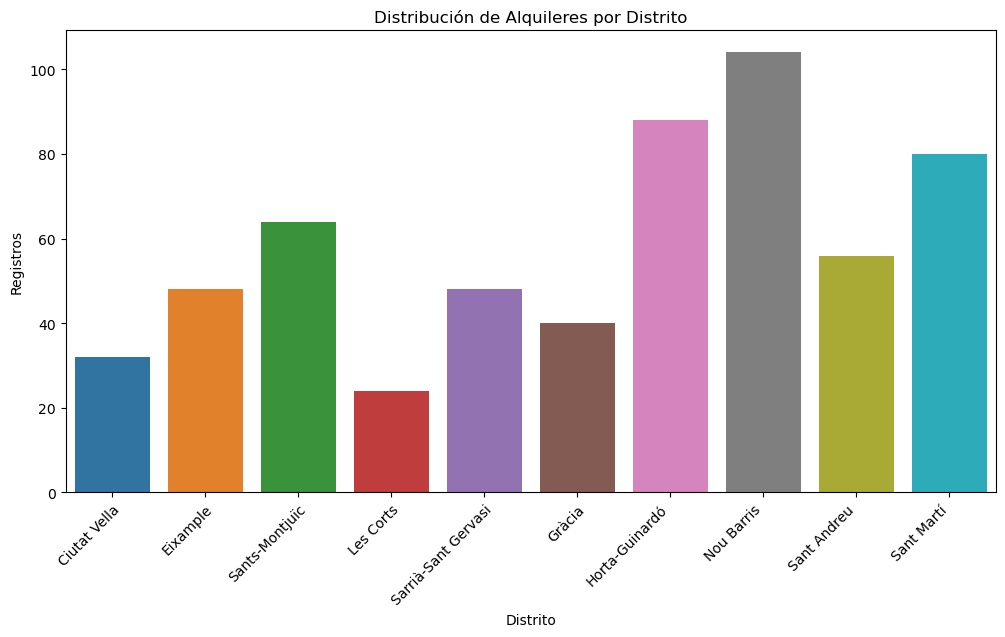

In [7]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
sns.countplot(x='Nom_Districte', data=alquiler)
plt.xlabel("Distrito")
plt.ylabel('Registros')
plt.title('Distribución de Alquileres por Distrito')
plt.show()

Esta grafica examina, con countplot, el como se distribuyen los registros que hay de cada distrito diferente. Ejemplo: Nou Barri tiene más de 100 registros y es el tiene mayor cantidad de apariciones en el dataframe y se ve reflejado en el grafico.
De hecho abajo tenemos basicamente lo mismo pero mostrado de forma directa

In [8]:
alquiler['Nom_Districte'].value_counts()

Nou Barris             104
Horta-Guinardó          88
Sant Martí              80
Sants-Montjuïc          64
Sant Andreu             56
Eixample                48
Sarrià-Sant Gervasi     48
Gràcia                  40
Ciutat Vella            32
Les Corts               24
Name: Nom_Districte, dtype: int64

## Variable Númerica

Aquí vemos cual es la media de lo que se paga mensualmente por superficie, tuve que crear 'Aquieler' para simplificar el proceso al descartar la mensualidad media y ordena ascendentemente.

In [9]:
Aquiler = (alquiler[alquiler['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']).sort_values(by='Preu')

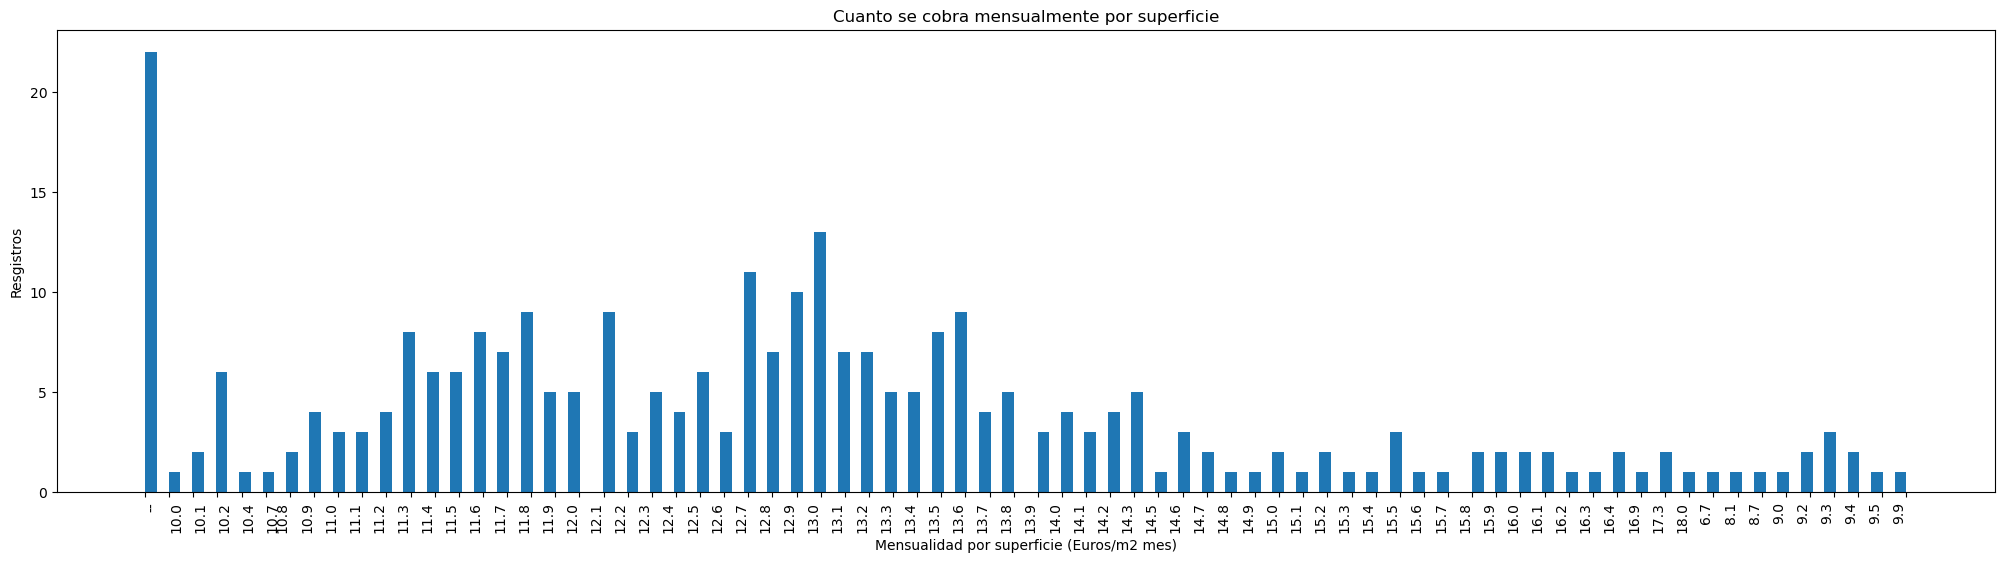

In [10]:
plt.figure(figsize=(25, 6))
plt.xticks(rotation=90, ha='right', rotation_mode='anchor')
plt.hist(Aquiler['Preu'], bins=150)
plt.xlabel("Mensualidad por superficie (Euros/m2 mes)")
plt.ylabel('Resgistros')
plt.title('Cuanto se cobra mensualmente por superficie')
plt.show()

Posteriormente me di cuenta que 'Preu' estaba en texto y no números lo que dificulto tablas posterires, por lo que lo converti a números y (como podran ver) existen los - los cuales converti en null para luego descartarlos, ya que no creí que pudieran proporcionar ningún tipo de dato relevante.

In [11]:
Aquiler.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri
count,292.0,292.000000,292.000000,292.000000
mean,2021.0,2.500000,6.246575,37.000000
std,0.0,1.119953,2.793123,21.107481
min,2021.0,1.000000,1.000000,1.000000
25%,2021.0,1.750000,4.000000,19.000000
50%,2021.0,2.500000,7.000000,37.000000
75%,2021.0,3.250000,8.000000,55.000000
max,2021.0,4.000000,10.000000,73.000000


In [12]:
Aquiler['Preu'] = pd.to_numeric(Aquiler['Preu'], errors='coerce')

In [13]:
Aquiler.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,292.0,292.000000,292.000000,292.000000,270.000000
mean,2021.0,2.500000,6.246575,37.000000,12.720741
std,0.0,1.119953,2.793123,21.107481,1.701480
min,2021.0,1.000000,1.000000,1.000000,6.700000
25%,2021.0,1.750000,4.000000,19.000000,11.625000
50%,2021.0,2.500000,7.000000,37.000000,12.750000
75%,2021.0,3.250000,8.000000,55.000000,13.600000
max,2021.0,4.000000,10.000000,73.000000,18.000000


In [14]:
Aquiler = Aquiler.dropna()

In [15]:
Aquiler.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,270.0,270.000000,270.000000,270.000000,270.000000
mean,2021.0,2.503704,6.185185,36.459259,12.720741
std,0.0,1.120104,2.842024,21.390949,1.701480
min,2021.0,1.000000,1.000000,1.000000,6.700000
25%,2021.0,2.000000,3.250000,18.250000,11.625000
50%,2021.0,2.500000,7.000000,35.000000,12.750000
75%,2021.0,3.750000,8.000000,55.000000,13.600000
max,2021.0,4.000000,10.000000,73.000000,18.000000


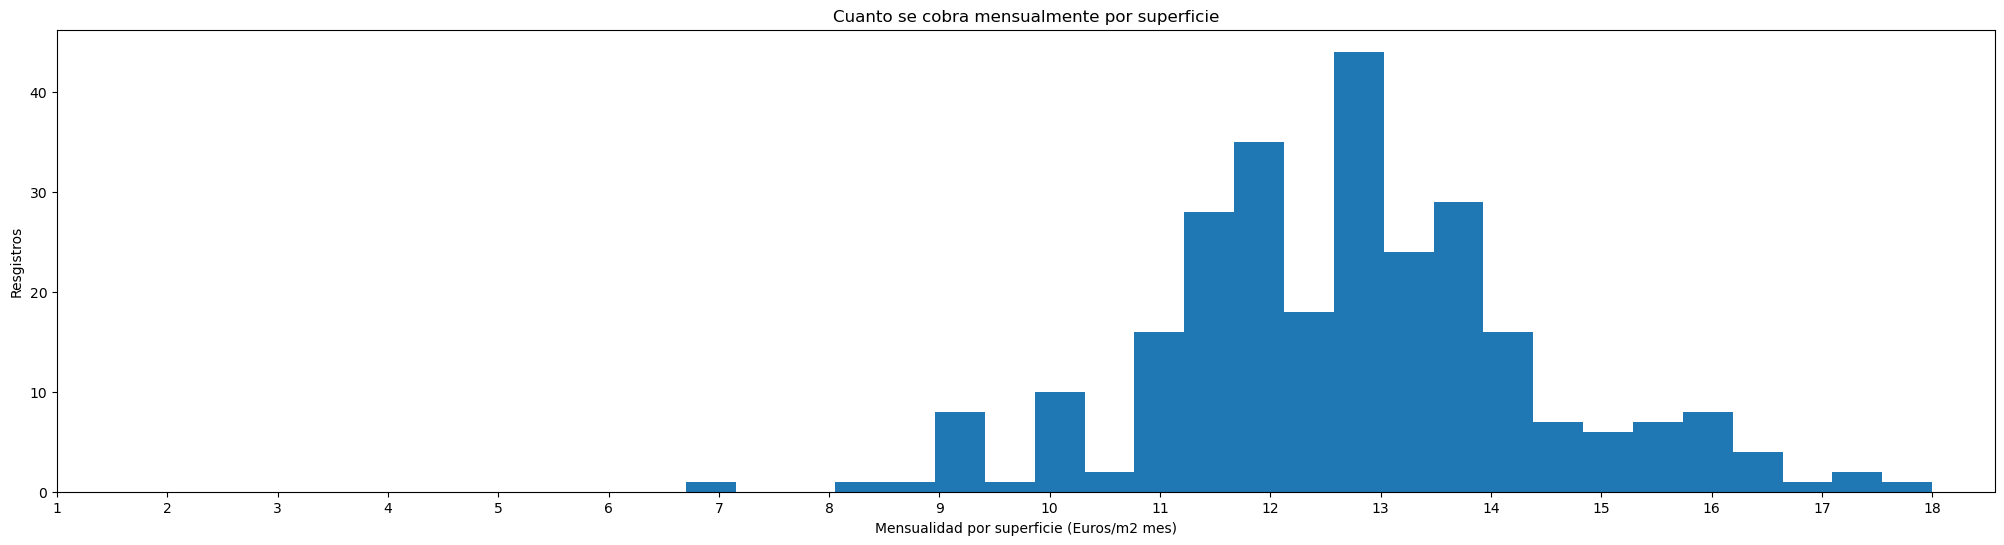

In [16]:
plt.figure(figsize=(25, 6))
plt.hist(Aquiler['Preu'], bins=25)
plt.xlabel("Mensualidad por superficie (Euros/m2 mes)")
plt.ylabel('Resgistros')
plt.xticks(range(1, 19), labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'])
plt.title('Cuanto se cobra mensualmente por superficie')
plt.show()

Lo más notorio en este histograma es que generalmente cobran entre 11-14 Euros/m2 mes.

## Una variable numérica y una categórica

Preguntar a la maestra si Transformar Preu a float esta bien

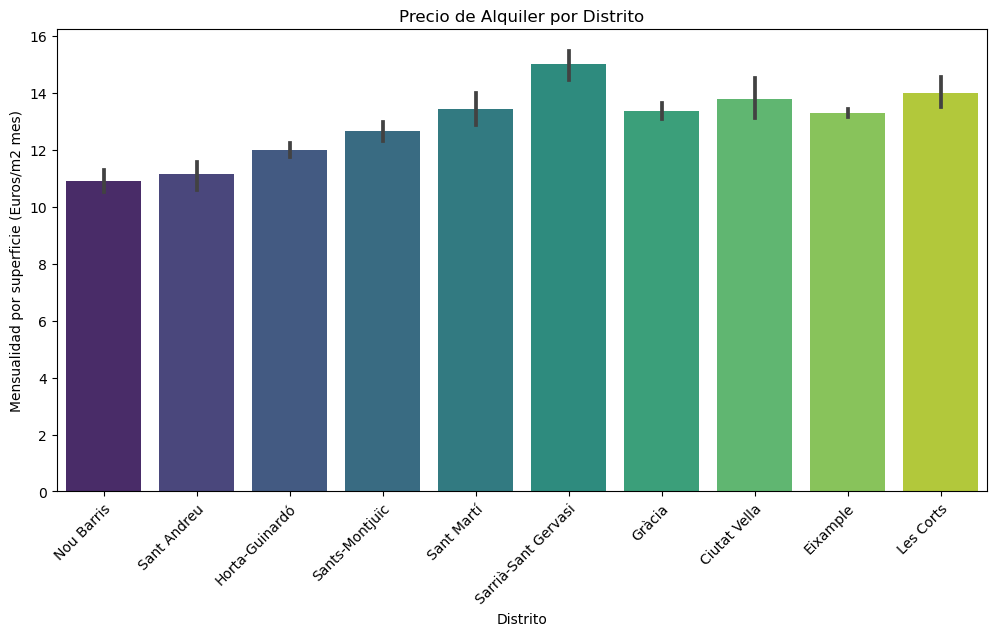

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom_Districte', y='Preu', data=Aquiler, palette='viridis')
plt.xlabel('Distrito')
plt.ylabel('Mensualidad por superficie (Euros/m2 mes)')
plt.title('Precio de Alquiler por Distrito')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

Aquí vemos la distribución de la mensualidad por superficie dividida por distrito. Así terminamos viendo como Sarrià-Sant Gervasi son los que cobran más, mientras Nou Barris tiende a cobrar menos.

## 2 variables númericas

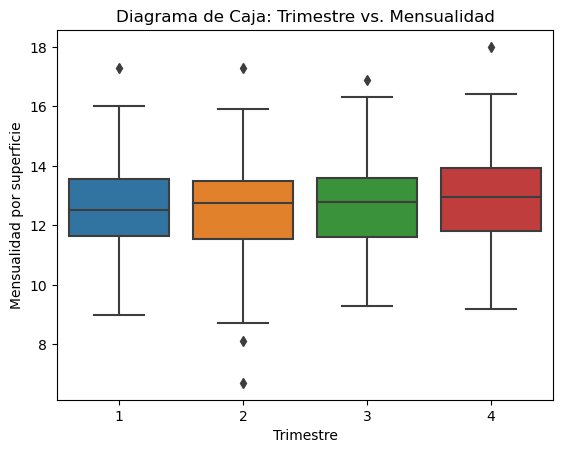

In [18]:
sns.boxplot(x='Trimestre', y='Preu', data=Aquiler)
plt.xlabel('Trimestre')
plt.ylabel('Mensualidad por superficie')
plt.title('Diagrama de Caja: Trimestre vs. Mensualidad')
plt.show()

En este diagrama donde comparamos la mensualidad con los 4 trimestres la maxima conclusión que se puede ver es que para el cuarto trimestre hubo un aumento en la renta por superficie aunque durante el segundo trimestre hubo una reducción ligera de los precios así como la mayor cantidad de valores atípicos (los puntos).

## 3 variables

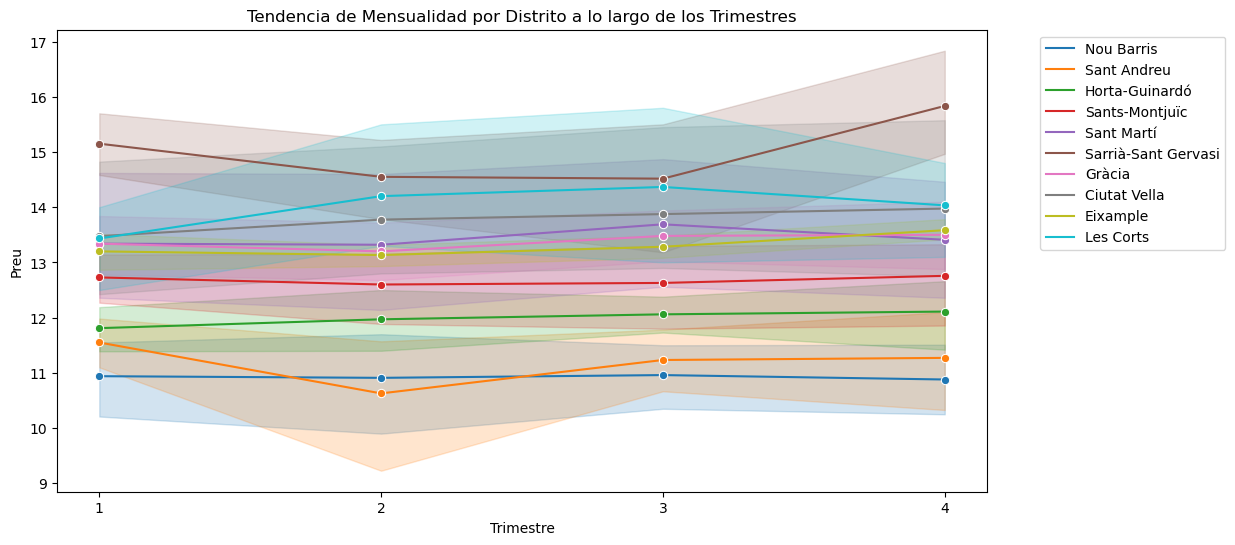

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Trimestre', y='Preu', hue='Nom_Districte', marker='o', data=Aquiler)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 5), labels=['1', '2', '3', '4'])
plt.title('Tendencia de Mensualidad por Distrito a lo largo de los Trimestres')
plt.show()

Vemos un grafico donde precio, trimestre y distrito son identificables. Podemos ver, por ejemplo, el precio del trimestre 4 en Sarrià-Sant Gervasi. La sombra que vemos en cada linea es el intervalo de confianza que tiene cada linea.